In [1]:
import random
from math import exp, sqrt
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [2]:
%%time
# Consider Simulating 1,000,000 paths

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

values = []

for _ in range(1_000_000):
    ST = S0 * exp((r - 0.5 * sigma ** 2) * T +
                  sigma * random.gauss(0, 1) * sqrt(T))
    values.append(ST)

CPU times: user 591 ms, sys: 20.1 ms, total: 611 ms
Wall time: 712 ms


In [3]:
%%time
# Let's do the same with numpy (vectorization)

S0 = 100
r = 0.05
T = 1.0
sigma = 0.2

ST = S0 * np.exp((r - 0.5 * sigma **2) * T +
                 sigma * np.random.standard_normal(1_000_000) * 
                 np.sqrt(T))

CPU times: user 24.7 ms, sys: 4.75 ms, total: 29.5 ms
Wall time: 34.8 ms


In [4]:
btc = yf.download('BTC-USD', start='2013-01-01', end=None)
btc['SMA'] = btc['Close'].rolling(100).mean()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


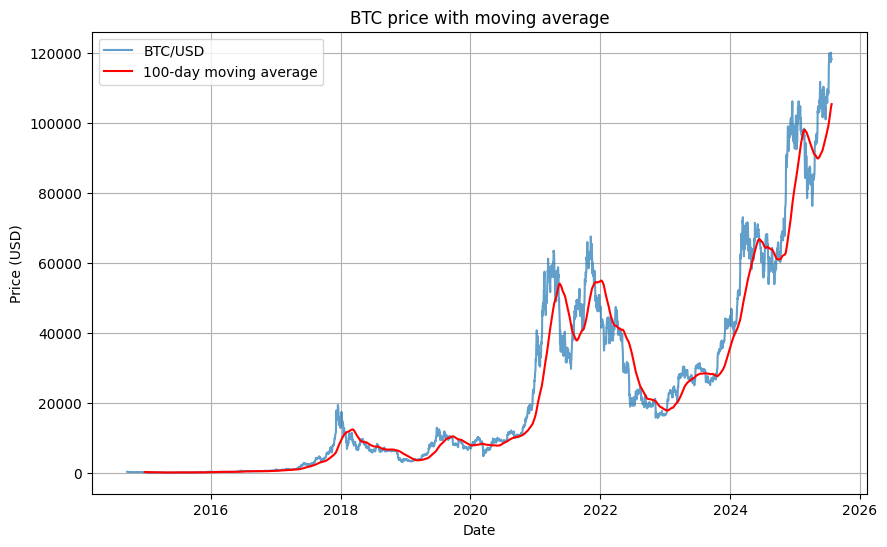

In [6]:
plt.figure(figsize=(10,6))
plt.plot(btc.index, btc['Close'], label='BTC/USD', alpha=0.7)
plt.plot(btc.index, btc['SMA'], label='100-day moving average', color='red')
plt.title("BTC price with moving average")
plt.xlabel("Date")
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Financial Trading motives

Beta trading
- Earning market risk premia by investing in, for instance, exchange traded funds
(ETFs) that replicate the performance of the S&P 500.

Alpha generation
- Earning risk premia independent of the market by, for example, selling short
stocks listed in the S&P 500 or ETFs on the S&P 500. Equals the return minus the benchmark.

Static hedging
- Hedging against market risks by buying, for example, out-of-the-money put
options on the S&P 500.

Dynamic hedging
- Hedging against market risks affecting options on the S&P 500 by, for example,
dynamically trading futures on the S&P 500 and appropriate cash, money mar‐
ket, or rate instruments.

Asset-liability management
- Trading S&P 500 stocks and ETFs to be able to cover liabilities resulting from, for
example, writing life insurance policies.

Market making
- Providing, for example, liquidity to options on the S&P 500 by buying and selling
options at different bid and ask prices.